In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [6]:

# Generate 5 years of monthly data
date_rng = pd.date_range(start='2015-01-01', end='2019-12-01', freq='MS')

# Create synthetic sales data with trend + seasonality + random noise
np.random.seed(42)
sales = 200 + (np.arange(len(date_rng)) * 2) + 20*np.sin(2*np.pi*date_rng.month/12) + np.random.normal(0, 5, len(date_rng))

# Create DataFrame
df = pd.DataFrame({'Date': date_rng, 'Sales': sales})
df.set_index('Date', inplace=True)

print(df.head(15))


                 Sales
Date                  
2015-01-01  212.483571
2015-02-01  218.629187
2015-03-01  227.238443
2015-04-01  230.935657
2015-05-01  216.829233
2015-06-01  208.829315
2015-07-01  209.896064
2015-08-01  200.516666
2015-09-01  193.652628
2015-10-01  203.392292
2015-11-01  207.682912
2015-12-01  219.671351
2016-01-01  235.209811
2016-02-01  233.754107
2016-03-01  239.375411


In [7]:
train=df.iloc[:-24]
test=df.iloc[-24:]

In [10]:
model=SARIMAX(train['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)

C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
results = model.fit(disp=False)

C:\Users\divya laxmi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [12]:
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_conf = forecast.conf_int()

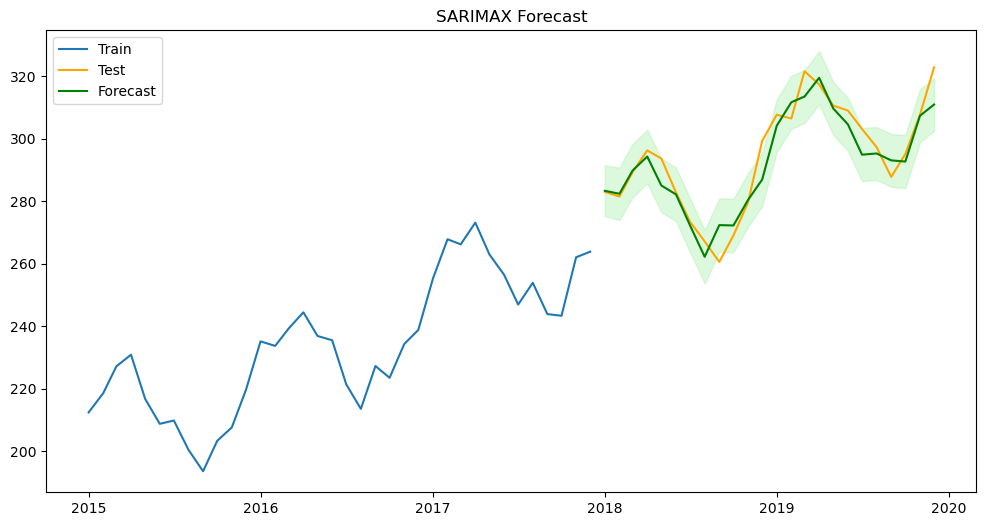

In [13]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Sales'], label="Train")
plt.plot(test.index, test['Sales'], label="Test", color="orange")
plt.plot(test.index, forecast_mean, label="Forecast", color="green")
plt.fill_between(test.index, forecast_conf['lower Sales'], forecast_conf['upper Sales'], 
                 color='lightgreen', alpha=0.3)
plt.legend()
plt.title("SARIMAX Forecast")
plt.show()

In [14]:
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast_mean))
print("SARIMAX RMSE:", rmse)

SARIMAX RMSE: 5.716763367887533
